In [1]:
import os
import sys
import numpy as np

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')

# Add the src directory to sys.path
sys.path.append(src_dir)


from Dataset.cancer_dataset_for_LS import main_generate_cancer_matrices_for_LS, load_cancer_dataset_matrices_for_LS
from analysis.commons import data_normalize_by_features, concatenate_B_b

from estimator.NDIS import BasicNDISEstimator

In [2]:
file_X_path = os.path.join(project_dir, "Dataset", "cancer-LR-X.txt")
file_y_path = os.path.join(project_dir, "Dataset", "cancer-LR-y.txt")

X = None
y = None
try:
    X, y = load_cancer_dataset_matrices_for_LS(file_X_name=file_X_path, file_y_name=file_y_path)
except:
    main_generate_cancer_matrices_for_LS(file_X_name=file_X_path, file_y_name=file_y_path)
    X, y = load_cancer_dataset_matrices_for_LS()

B, b = data_normalize_by_features(X, y)
A = concatenate_B_b(B, b)

d = B.shape[1]
r = 300

In [3]:
from analysis.least_square_numerical import delta_pq_ls_left
import mpmath as mp

eps = 1
l = 1
sigma = 5
rho = 100
mp.log(delta_pq_ls_left(p = l**2/(sigma**2 + l**2), q = 1/(1+rho**2) + l**2/(sigma**2 + l**2) , d = d, r = r, eps = eps, workers=2, dps=80))

mpf('-25.792506666674049129950293365685198760615191296569351628600869367460421078707983165')

Computing values for different rho using 4 workers...
rho = 5.00, log(delta) = -3.279906
rho = 10.00, log(delta) = -6.936365
rho = 15.00, log(delta) = -10.155083
rho = 20.00, log(delta) = -12.817154
rho = 25.00, log(delta) = -14.976660
rho = 30.00, log(delta) = -16.732718
rho = 35.00, log(delta) = -18.175516
rho = 40.00, log(delta) = -19.375835
rho = 45.00, log(delta) = -20.386942
rho = 50.00, log(delta) = -21.248620
rho = 55.00, log(delta) = -21.990754
rho = 60.00, log(delta) = -22.636032
rho = 65.00, log(delta) = -23.201894
rho = 70.00, log(delta) = -23.701921
rho = 75.00, log(delta) = -24.146819
rho = 80.00, log(delta) = -24.545123
rho = 85.00, log(delta) = -24.903717
rho = 90.00, log(delta) = -25.228205
rho = 95.00, log(delta) = -25.523195
rho = 100.00, log(delta) = -25.792507


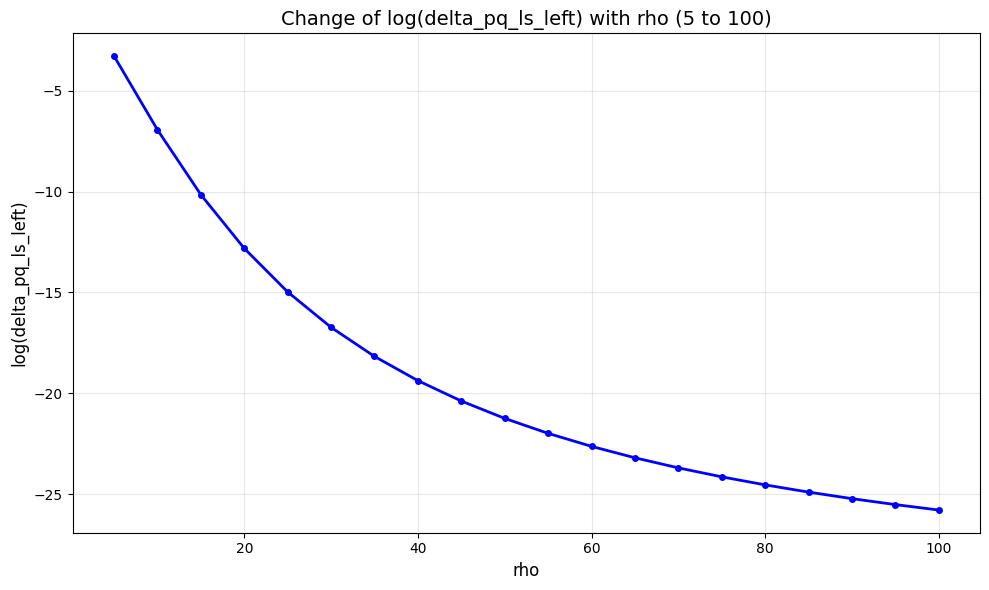

In [4]:
import matplotlib.pyplot as plt
import multiprocessing
from functools import partial

# Helper function to compute result for a single rho value
def compute_log_delta(rho_val, l, sigma, d, r, eps):
    """Compute log(delta_pq_ls_left) for a given rho value"""
    p = l**2/(sigma**2 + l**2)
    q = 1/(1+rho_val**2) + l**2/(sigma**2 + l**2)
    result = mp.log(delta_pq_ls_left(
        p=p, 
        q=q, 
        d=d, 
        r=r, 
        eps=eps, 
        workers=1, 
        dps=80
    ))
    return float(result), rho_val

# Create range of rho values from 5 to 100
rho_values = np.linspace(5, 100, 20)  # 20 points for smooth plot

# Parallel computation
num_workers = 4  # Adjust based on your CPU cores
print(f"Computing values for different rho using {num_workers} workers...")

# Create partial function with fixed parameters
compute_func = partial(compute_log_delta, l=l, sigma=sigma, d=d, r=r, eps=eps)

# Use multiprocessing pool
pool = multiprocessing.Pool(processes=num_workers)
results = pool.map(compute_func, rho_values)
pool.close()
pool.join()

# Extract results (results are in order matching rho_values)
log_delta_values = [result[0] for result in results]
rho_computed = [result[1] for result in results]

# Print results
for rho_val, log_delta in zip(rho_computed, log_delta_values):
    print(f"rho = {rho_val:.2f}, log(delta) = {log_delta:.6f}")

# Convert to numpy arrays for plotting
rho_values = np.array(rho_values)
log_delta_values = np.array(log_delta_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(rho_values, log_delta_values, 'b-', linewidth=2, marker='o', markersize=4)
plt.xlabel('rho', fontsize=12)
plt.ylabel('log(delta_pq_ls_left)', fontsize=12)
plt.title('Change of log(delta_pq_ls_left) with rho (5 to 100)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optionally save the figure
# plt.savefig(os.path.join(fig_dir, 'expression_2_left_rho_variation.png'), dpi=300)


Computing values for different sigma (rho fixed at 10) using 20 workers...
sigma = 1.00, log(delta) = -0.545049
sigma = 1.47, log(delta) = -1.237359
sigma = 1.95, log(delta) = -1.929315
sigma = 2.42, log(delta) = -2.622155
sigma = 2.89, log(delta) = -3.330250
sigma = 3.37, log(delta) = -4.065855
sigma = 3.84, log(delta) = -4.838837
sigma = 4.32, log(delta) = -5.657579
sigma = 4.79, log(delta) = -6.529699
sigma = 5.26, log(delta) = -7.462551
sigma = 5.74, log(delta) = -8.463595
sigma = 6.21, log(delta) = -9.540699
sigma = 6.68, log(delta) = -10.702411
sigma = 7.16, log(delta) = -11.958240
sigma = 7.63, log(delta) = -13.318963
sigma = 8.11, log(delta) = -14.796990
sigma = 8.58, log(delta) = -16.406819
sigma = 9.05, log(delta) = -18.165607
sigma = 9.53, log(delta) = -20.093937
sigma = 10.00, log(delta) = -22.216838


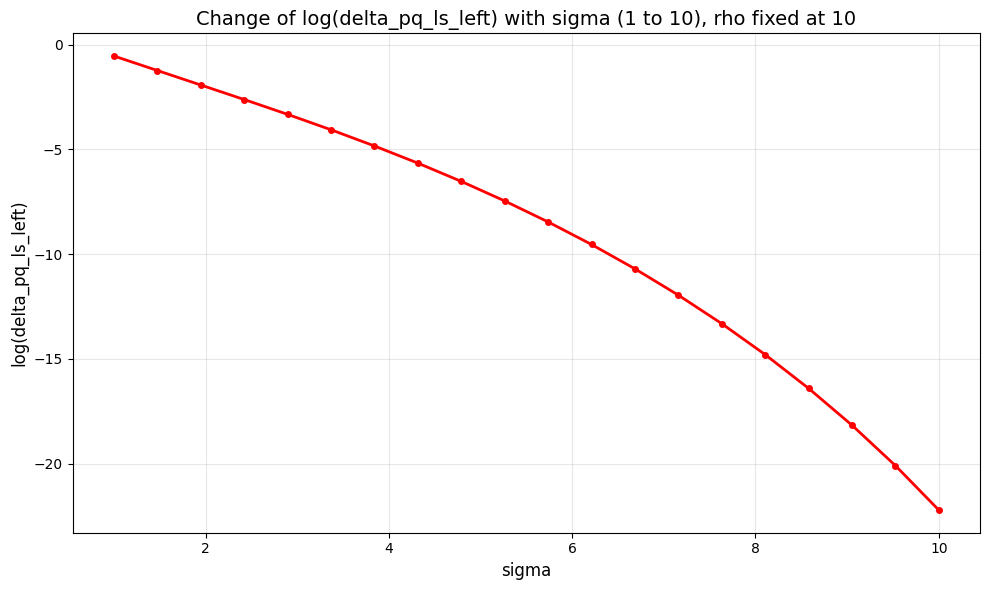

In [10]:
import matplotlib.pyplot as plt
import multiprocessing
from functools import partial

# Helper function to compute result for a single sigma value
def compute_log_delta_sigma(sigma_val, l, rho, d, r, eps):
    """Compute log(delta_pq_ls_left) for a given sigma value"""
    p = l**2/(sigma_val**2 + l**2)
    q = 1/(1+rho**2) + l**2/(sigma_val**2 + l**2)
    result = mp.log(delta_pq_ls_left(
        p=p, 
        q=q, 
        d=d, 
        r=r, 
        eps=eps, 
        workers=1, 
        dps=80
    ))
    return float(result), sigma_val

# Fixed parameters
rho = 10  # Fixed rho
l = 1
eps = 1

# Create range of sigma values from 1 to 10
sigma_values = np.linspace(1, 10, 20)  # 20 points for smooth plot

# Parallel computation
num_workers = 20  # Adjust based on your CPU cores
print(f"Computing values for different sigma (rho fixed at {rho}) using {num_workers} workers...")

# Create partial function with fixed parameters
compute_func = partial(compute_log_delta_sigma, l=l, rho=rho, d=d, r=r, eps=eps)

# Use multiprocessing pool
pool = multiprocessing.Pool(processes=num_workers)
results = pool.map(compute_func, sigma_values)
pool.close()
pool.join()

# Extract results (results are in order matching sigma_values)
log_delta_values = [result[0] for result in results]
sigma_computed = [result[1] for result in results]

# Print results
for sigma_val, log_delta in zip(sigma_computed, log_delta_values):
    print(f"sigma = {sigma_val:.2f}, log(delta) = {log_delta:.6f}")

# Convert to numpy arrays for plotting
sigma_values = np.array(sigma_values)
log_delta_values = np.array(log_delta_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, log_delta_values, 'r-', linewidth=2, marker='o', markersize=4)
plt.xlabel('sigma', fontsize=12)
plt.ylabel('log(delta_pq_ls_left)', fontsize=12)
plt.title(f'Change of log(delta_pq_ls_left) with sigma (1 to 10), rho fixed at {rho}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optionally save the figure
# plt.savefig(os.path.join(fig_dir, 'expression_2_left_sigma_variation.png'), dpi=300)


Computing values for different rho using 20 workers...
rho = 5.00, log(delta) = -1.591929
rho = 10.00, log(delta) = -3.490962
rho = 15.00, log(delta) = -5.012368
rho = 20.00, log(delta) = -6.218816
rho = 25.00, log(delta) = -7.176642
rho = 30.00, log(delta) = -7.945490
rho = 35.00, log(delta) = -8.571671
rho = 40.00, log(delta) = -9.089286
rho = 45.00, log(delta) = -9.523153
rho = 50.00, log(delta) = -9.891434
rho = 55.00, log(delta) = -10.207576
rho = 60.00, log(delta) = -10.481677
rho = 65.00, log(delta) = -10.721433
rho = 70.00, log(delta) = -10.932790
rho = 75.00, log(delta) = -11.120405
rho = 80.00, log(delta) = -11.287972
rho = 85.00, log(delta) = -11.438452
rho = 90.00, log(delta) = -11.574248
rho = 95.00, log(delta) = -11.697329
rho = 100.00, log(delta) = -11.809324


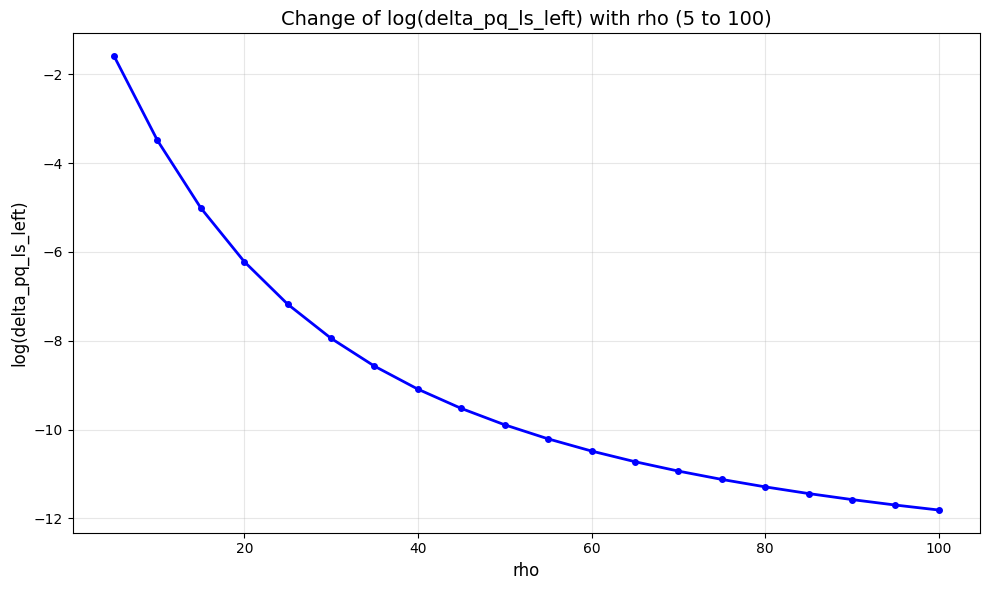

In [7]:
# Create range of rho values from 5 to 100
rho_values = np.linspace(5, 100, 20)  # 20 points for smooth plot

# Parallel computation
num_workers = 20  # Adjust based on your CPU cores
print(f"Computing values for different rho using {num_workers} workers...")

# Create partial function with fixed parameters
compute_func = partial(compute_log_delta, l=l, sigma=3, d=d, r=r, eps=1)

# Use multiprocessing pool
pool = multiprocessing.Pool(processes=num_workers)
results = pool.map(compute_func, rho_values)
pool.close()
pool.join()

# Extract results (results are in order matching rho_values)
log_delta_values = [result[0] for result in results]
rho_computed = [result[1] for result in results]

# Print results
for rho_val, log_delta in zip(rho_computed, log_delta_values):
    print(f"rho = {rho_val:.2f}, log(delta) = {log_delta:.6f}")

# Convert to numpy arrays for plotting
rho_values = np.array(rho_values)
log_delta_values = np.array(log_delta_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(rho_values, log_delta_values, 'b-', linewidth=2, marker='o', markersize=4)
plt.xlabel('rho', fontsize=12)
plt.ylabel('log(delta_pq_ls_left)', fontsize=12)
plt.title('Change of log(delta_pq_ls_left) with rho (5 to 100)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optionally save the figure
# plt.savefig(os.path.join(fig_dir, 'expression_2_left_rho_variation.png'), dpi=300)
